**Importing required packages**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

## 1. Iris Dataset

**Reading the Iris flower species dataset and Encoding the class labels**

In [2]:
colnames = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class_label']
iris_df = pd.read_csv('iris.csv', names = colnames, header = None)
iris_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class_label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Converting categorical data into numerical data (class_label column)**

In [3]:
iris_df['class_label'] = iris_df.class_label.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [4]:
iris_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class_label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Spliting the dataset into train and test sets.**

In [5]:
from sklearn.model_selection import train_test_split

X = iris_df.iloc[:, 0:4]
y = iris_df['class_label']

X.shape, y.shape

((150, 4), (150,))

In [6]:
X = X.to_numpy()
y = y.to_numpy()

In [7]:
# X, y

**Stratified sampling - makeing sure that labels are distributed evenly in train and test data**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size = 0.20, random_state = 0)

# using 1st two features
X_train = X_train[:, :2]
X_test = X_test[:, :2]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 2), (30, 2), (120,), (30,))

In [9]:
# X[:, 0]

**Implement the k-nearest neighbors algorithm**

In [10]:
import numpy as np
import statistics

class KNN:

    def __init__(self, k, distance_method='euclidean_distance', voting_method='majority', p = 3):
        self._k = k
        self._distance_method = distance_method
        self._voting_method = voting_method
        self._p = p

    # Euclidean distance
    def _euclidean_distance(self, a: float, b: float):
        return np.sqrt(np.sum((a - b) ** 2))
    
    # Manhattan distance
    def _manhattan_distance(self, a: float, b: float):
        return np.sum(np.abs(e1-e2) for e1, e2 in zip(a,b))
        
    # Minkowski distance
    def _minkowski_distance(self, a: float, b: float):
        return np.sum(np.abs(e1-e2)**self._p for e1, e2 in zip(a,b))**(1/self._p)
        
    
    def fit(self, X_train, y_train):
        self._X_train = X_train
        self._y_train = y_train

    def predict(self, X_test):
        y_test = []

        X_test = X_test

        for row in X_test:
            if self._distance_method == 'manhattan_distance':
                distances = [self._manhattan_distance(row, training) for training in self._X_train]
            elif self._distance_method == 'minkowski_distance':
                distances = [self._minkowski_distance(row, training) for training in self._X_train]
            else:
                distances = [self._euclidean_distance(row, training) for training in self._X_train]

            # rotated sort
            sorted_index = np.argsort(distances)[: self._k]

            # getting the neighbours
            neighbors = [self._y_train[i] for i in sorted_index]

            # get the most used label
            common = sorted(neighbors, reverse=True)

            # predicted label
            if self._voting_method == 'majority':
                y_test.append(common[0])
            elif self._voting_method == 'median':                
                y_test.append(statistics.median(common))
                
        return y_test

**(a) Compare all four features distribution in each iris class using boxplots.**

In [11]:
#Creating separate dataframe for each Iris Class
iris_setosa = iris_df.loc[iris_df["class_label"] == 0]
iris_versicolor = iris_df.loc[iris_df["class_label"] == 1]
iris_virginica = iris_df.loc[iris_df["class_label"] == 2]
iris_setosa.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class_label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
# using iloc in order to remove class labels(last column) from individual dataframes
# iris_setosa.iloc[:, 0:-1]

**Boxplot**

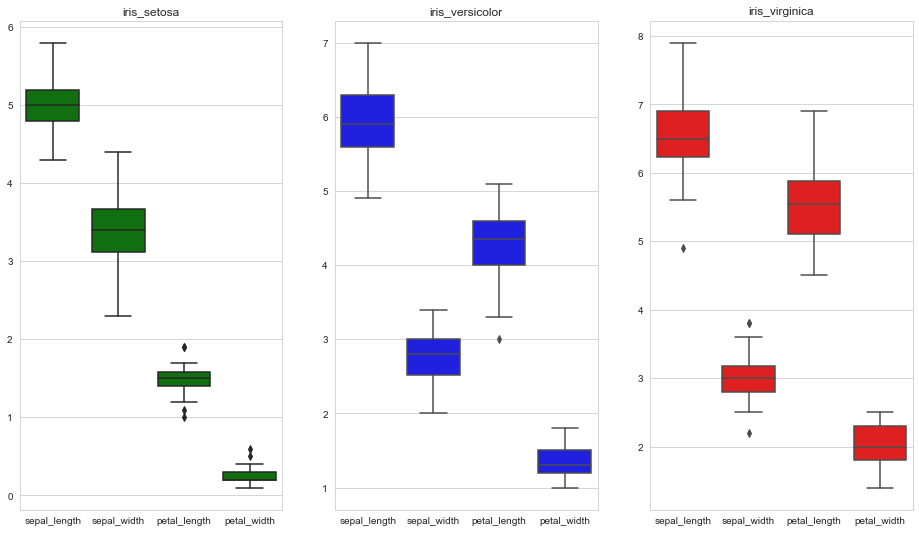

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(16,9))
sns.boxplot(data=iris_setosa.iloc[:, 0:-1], color = 'g', ax=axes[0]).set_title('iris_setosa')
sns.boxplot(data=iris_versicolor.iloc[:, 0:-1], color = 'b', ax=axes[1]).set_title('iris_versicolor')
sns.boxplot(data=iris_virginica.iloc[:, 0:-1], color = 'r', ax=axes[2]).set_title('iris_virginica')
plt.show()

**Conclusion:**
Comparison of all four features distribution in each iris class using boxplots.

Observing the boxplot, following are the observation :

-The Setosa Class usually has few outliers with smaller features.

-The Versicolor species has average features

-The Virginica species has the longest features widths and lengths as compared to others.


**(b) Start with k = 1, plot the decision boundary using the first two features (Sepal
length and width)**

**Scatter Plot and Decision Bounday**

In [14]:
# Scatter plot
from matplotlib.colors import ListedColormap

def scatter_plot(X, y, X_trn, y_trn, X_test, y_test, k, feature_idxs, knn, h=0.05):
    classes = list(set(y))
    legend = ['Setosa', 'Versicolour', 'Virginica']
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    colours = ['red', 'green', 'blue']
    pad = 0.5
    x_min, x_max = X[:, feature_idxs[0]].min() - pad, X[:, feature_idxs[0]].max() + pad
    y_min, y_max = X[:, feature_idxs[1]].min() - pad, X[:, feature_idxs[1]].max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z).reshape(xx.shape)

    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    for i in classes:
        idx = np.where(y_trn == classes[i])
        plt.scatter(X_trn[idx, 0],
                    X_trn[idx, 1],
                    c=colours[i],
                    label=legend[i]+'_train',
                    marker='o', s=20)
    for i in classes:
        idx = np.where(y_test == classes[i])
        plt.scatter(X_test[idx, 0],
                    X_test[idx, 1],
                    c=colours[i], label=legend[i]+'_test',
                    marker='x', s=20)
    plt.legend()
    plt.xlabel("Sepal length", fontsize=16)
    plt.ylabel("Sepal width", fontsize=16)
    plt.title("kNN classification (k = {})"
              .format(k), fontsize=16)
    plt.show()

**With k = 1, plotting the decision boundary using the first two features (Sepal
length and width)**

C:\Users\nehad\AppData\Local\Temp/ipykernel_10644/2501547363.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


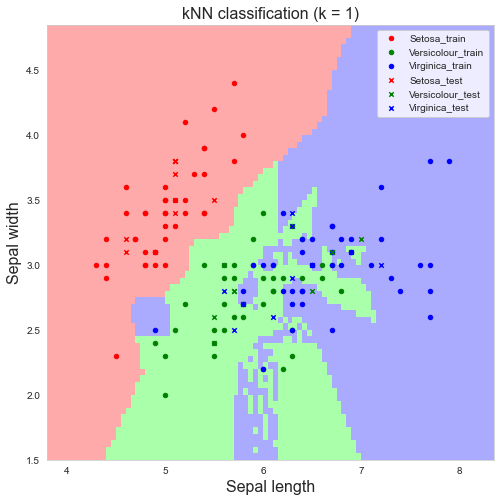

In [15]:
k = 1
KNN_Classifier1 = KNN(k)
KNN_Classifier1.fit(X_train, y_train)
prediction = KNN_Classifier1.predict(X_test)


feature_idxs = [0, 1]
scatter_plot(X, y, X_train, y_train, X_test, y_test, k, feature_idxs, KNN_Classifier1)


**(c) Perform the prediction using k = 2, 4, 6, 10 and plot the decision boundaries.
How does the decision boundary change by increasing the number of neighbors?**

C:\Users\nehad\AppData\Local\Temp/ipykernel_10644/2501547363.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


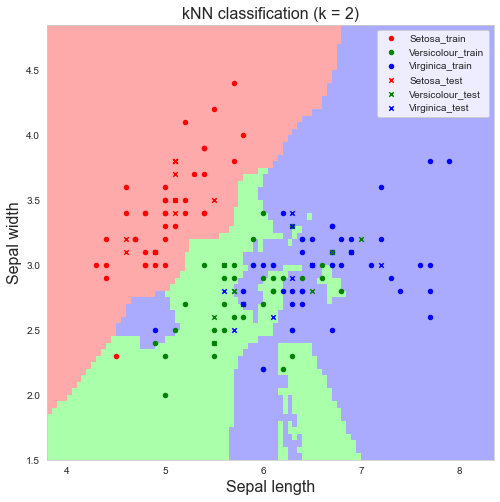

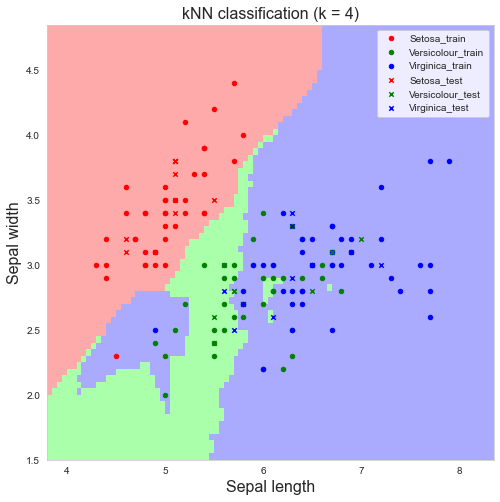

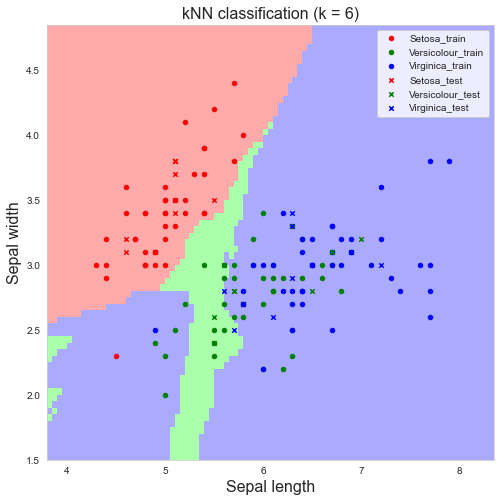

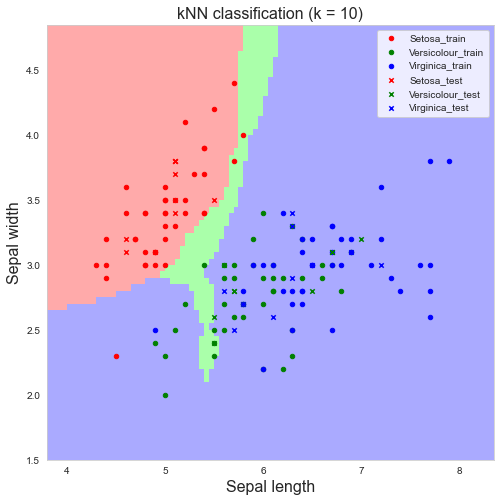

In [16]:
k_list = [2, 4, 6, 10]
feature_idxs = [0, 1]


for k in k_list:
    KNN_Classifier = KNN(k)
    KNN_Classifier.fit(X_train, y_train)
    prediction = KNN_Classifier.predict(X_test)
    scatter_plot(X, y, X_train, y_train, X_test, y_test, k, feature_idxs, KNN_Classifier)
   

**Conclusion:**
The decision boundary becomes more smooth between the different classes on increasing the value of k which means lower variance but increased bias.


**(d) For all cases, report accuracy and confusion matrix.**

In [17]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

k_list = [2, 4, 6, 10]

for k in k_list:
    KNN_Classifier = KNN(k)
    KNN_Classifier.fit(X_train, y_train)
    prediction = KNN_Classifier.predict(X_test)
    print(f"k = {k} ")
    print("Confusion Matrix: ")
    print(metrics.confusion_matrix(y_test, prediction))
    print("Accuracy: ", metrics.accuracy_score(y_test, prediction))
    print("------------------------------------")

k = 2 
Confusion Matrix: 
[[10  0  0]
 [ 0  3  7]
 [ 0  3  7]]
Accuracy:  0.6666666666666666
------------------------------------
k = 4 
Confusion Matrix: 
[[10  0  0]
 [ 0  3  7]
 [ 0  1  9]]
Accuracy:  0.7333333333333333
------------------------------------
k = 6 
Confusion Matrix: 
[[10  0  0]
 [ 0  2  8]
 [ 0  0 10]]
Accuracy:  0.7333333333333333
------------------------------------
k = 10 
Confusion Matrix: 
[[10  0  0]
 [ 0  0 10]
 [ 0  0 10]]
Accuracy:  0.6666666666666666
------------------------------------


## 2. Bank notes Dataset

**Reading the Bank notes dataset and Encoding the class labels**

In [18]:
colnames = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'class_label']
banknote_df = pd.read_csv('data_banknote_authentication.csv', names = colnames, header = None)
banknote_df.head(5)

,Variance,Skewness,Kurtosis,Entropy,class_label
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


**Spliting the dataset into train and test sets.**

In [19]:
from sklearn.model_selection import train_test_split

X = banknote_df.iloc[:, 0:4]
y = banknote_df['class_label']

X.shape, y.shape

((1372, 4), (1372,))

In [20]:
# X

In [21]:
X = X.to_numpy()
y = y.to_numpy()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size = 0.20, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1097, 4), (275, 4), (1097,), (275,))

**(a) Perform a 2-nearest neighbor on bank note dataset using 80% of the data as training data and the rest as test. Report the accuracy and confusion matrix.**

In [23]:
k = 2
KNN_Classifier1 = KNN(k)
KNN_Classifier1.fit(X_train, y_train)
prediction = KNN_Classifier1.predict(X_test)

print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, prediction))
print("Accuracy: ", metrics.accuracy_score(y_test, prediction))
print("Error rate: Voting method -Using Most common votes:", (1- metrics.accuracy_score(y_test, prediction)))

Confusion Matrix: 
[[153   0]
 [  0 122]]
Accuracy:  1.0
Error rate: Voting method -Using Most common votes: 0.0


**(b) Change the majority based voting with a method of your choosing. How does it affect the error rate?**

In [24]:
k = 2
KNN_Classifier1 = KNN(k, voting_method='median')
KNN_Classifier1.fit(X_train, y_train)
prediction = KNN_Classifier1.predict(X_test)

print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, prediction))
print("Accuracy: ", metrics.accuracy_score(y_test, prediction))
print("Error rate: Voting method - Using Median votes:", (1- metrics.accuracy_score(y_test, prediction)))

Confusion Matrix: 
[[153   0]
 [  0 122]]
Accuracy:  1.0
Error rate: Voting method - Using Median votes: 0.0


**Conclusion:**

Changing the majority based voting with the Median voting method, this new method did not affect the error rate

**(c) Use two new distance measures: Manhattan distance and L3 (Minkowski formula for p = 3), and redo the previous step. How does changing the distance function affect the classification?**

**Using "Manhattan distance", Voting method = "Median"**  [reported accuracy and confusion matrix]

In [25]:
k = 2
KNN_Classifier1 = KNN(k, voting_method='median', distance_method = 'manhattan_distance')
KNN_Classifier1.fit(X_train, y_train)
prediction = KNN_Classifier1.predict(X_test)

print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, prediction))
print("Accuracy: ", metrics.accuracy_score(y_test, prediction))
print("Error rate: Voting method - Using Median votes:", (1- metrics.accuracy_score(y_test, prediction)))

C:\Users\nehad\AppData\Local\Temp/ipykernel_10644/3845079202.py:18: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(np.abs(e1-e2) for e1, e2 in zip(a,b))


Confusion Matrix: 
[[153   0]
 [  0 122]]
Accuracy:  1.0
Error rate: Voting method - Using Median votes: 0.0


**Using "Minkowski formula for p = 3", Voting method = "Median"** [reported accuracy and confusion matrix]

In [26]:
k = 2
KNN_Classifier1 = KNN(k, voting_method='median', distance_method = 'minkowski_distance', p = 3)
KNN_Classifier1.fit(X_train, y_train)
prediction = KNN_Classifier1.predict(X_test)

print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, prediction))
print("Accuracy: ", metrics.accuracy_score(y_test, prediction))
print("Error rate: Voting method - Using Median votes:", (1- metrics.accuracy_score(y_test, prediction)))

C:\Users\nehad\AppData\Local\Temp/ipykernel_10644/3845079202.py:22: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(np.abs(e1-e2)**self._p for e1, e2 in zip(a,b))**(1/self._p)


Confusion Matrix: 
[[153   0]
 [  0 122]]
Accuracy:  1.0
Error rate: Voting method - Using Median votes: 0.0


**Conclusion**

Changing the distance function did **not have any affect** on the classification

## 3. MNIST Dataset

**Reading the MNIST dataset and Encoding the class labels**

In [27]:
MNIST_df_train = pd.read_csv('mnist_train.csv', header = None)
MNIST_df_test = pd.read_csv('mnist_test.csv', header = None)

# MNIST_df_train.head(5)

**Perform the 2-nearest neighbors on MNIST dataset using 500, 1000, 2500, 5000, and 10000 training examples.(You can use 1000 test examples)**

In [28]:
k = 2
errors = []

# Taking 1000 samples from the testing data and dividing it into X_test and y_test
sample_df_test = MNIST_df_test.sample(n=1000)
X_test = (sample_df_test.iloc[:, 1:]).to_numpy()
y_test = (sample_df_test.iloc[:, 0:1]).to_numpy()

# Increasing training data size and dividing it into X_train and y_train
n_list = [500, 1000, 2500, 5000, 10000]

# Running KNN and reporting the error rate for different training data
for n in n_list:
    sample_df_train = MNIST_df_train.sample(n)
    X_train = (sample_df_train.iloc[:, 1:]).to_numpy()
    y_train = (sample_df_train.iloc[:, 0:1]).to_numpy()
    KNN_Classifier1 = KNN(k)
    KNN_Classifier1.fit(X_train, y_train)
    prediction = KNN_Classifier1.predict(X_test)
    print(f"Training data: {n}, Testing data: {1000} ")
    err = (1 - metrics.accuracy_score(y_test, prediction))
    errors.append(err)
    print("Error rate:", err)
    print("\n")


Training data: 500, Testing data: 1000 
Error rate: 0.19999999999999996


Training data: 1000, Testing data: 1000 
Error rate: 0.138


Training data: 2500, Testing data: 1000 
Error rate: 0.09499999999999997


Training data: 5000, Testing data: 1000 
Error rate: 0.06899999999999995


Training data: 10000, Testing data: 1000 
Error rate: 0.05700000000000005




**Pot : Number of training Data vs Errors**

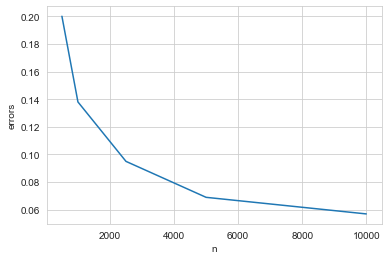

In [29]:
plt.plot(n_list, errors) 
plt.xlabel("n") 
plt.ylabel("errors")
plt.show()

**How does the classification error change with number of training example?**

**Conclusion**

Once more training examples were added (increased from 500 to 10000), the test-error rate lowered for the model

**(b) Report confusion matrix of the best model?**

Best model comes when I am using 10000 training data (Test data used is 1000)

In [30]:
sample_df_train = MNIST_df_train.sample(1000)
X_train = (sample_df_train.iloc[:, 1:]).to_numpy()
y_train = (sample_df_train.iloc[:, 0:1]).to_numpy()
KNN_Classifier1 = KNN(k)
KNN_Classifier1.fit(X_train, y_train)
prediction = KNN_Classifier1.predict(X_test)
print(f"Training data: {n}, Testing data: {1000} ")
print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, prediction))

Training data: 10000, Testing data: 1000 
Confusion Matrix: 
[[ 97   1   0   1   0   1   5   0   0   1]
 [  0 111   0   0   0   0   0   0   0   0]
 [  2   3  88   4   2   0   1   5   5   1]
 [  0   1   2  78   0   2   0   1   4   2]
 [  0   1   0   0  67   0   2   5   0  23]
 [  0   1   0   0   0  74   4   1   2   1]
 [  0   3   0   0   0   0  74   1   0   0]
 [  0   0   0   0   0   0   0 102   0   8]
 [  0   1   0   1   0   7   2   0  93  11]
 [  1   0   0   0   2   1   0   2   1  91]]
